In [317]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import models
from tensorflow.keras import layers


In [318]:
df = pd.read_csv('dataset_phishing_red2.csv')
df

,url,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,status
0,http://www.crestonwood.com/router.php,37,19,3,0,0,0,0,0,0,...,3,3,3,11,11,6,5.750000,7.00,4.500000,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,0,0,0,0,0,0,...,2,19,2,32,19,32,15.750000,19.00,14.666667,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,4,1,0,1,2,3,2,...,2,3,2,17,13,17,8.250000,8.40,8.142857,phishing
3,http://rgipt.ac.in,18,11,2,0,0,0,0,0,0,...,5,5,0,5,5,0,5.000000,5.00,0.000000,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,2,2,0,0,0,0,0,...,3,3,4,11,7,11,6.333333,5.00,7.000000,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,2,0,0,0,0,0,0,...,3,3,8,11,9,11,7.750000,6.00,9.500000,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,5,0,1,1,0,1,0,...,3,3,3,10,10,8,5.166667,6.50,4.900000,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,2,6,0,1,0,1,1,...,1,3,1,15,8,15,6.153846,5.50,6.272727,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,2,0,0,0,0,0,0,...,3,3,0,22,22,0,12.500000,12.50,0.000000,legitimate


In [319]:
df['status'] = df['status'].eq('phishing').mul(1)

In [320]:
binary_columns = [col for col in df if np.isin(df[col].unique(), [0, 1]).all()]
numeric_columns = [x for x in df.columns if x not in binary_columns]
numeric_columns.remove('url')
df_copy = df.drop(['url'], axis=1)

In [223]:
def mean_max_normalization(data, numeric_columns):
    data = data.copy()
    for column in numeric_columns:
        column_data = MinMaxScaler().fit_transform(data[[column]])
        column_data = pd.DataFrame(column_data, columns = [column])
        data[column] = column_data
    return data

df_copy = mean_max_normalization(df,numeric_columns)


In [146]:
def zscore_normalization(data, numeric_columns):
    for column in numeric_columns:
        column_data = StandardScaler().fit_transform(data[[column]])
        column_data = pd.DataFrame(column_data, columns = [column])
        data[column] = column_data
    return data

df_copy = zscore_normalization(df,numeric_columns)

In [288]:
df

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,status
0,37,19,3,0,0,0,0,0,0,0,...,3,3,3,11,11,6,5.750000,7.00,4.500000,0
1,77,23,1,0,0,0,0,0,0,0,...,2,19,2,32,19,32,15.750000,19.00,14.666667,1
2,126,50,4,1,0,1,2,3,2,0,...,2,3,2,17,13,17,8.250000,8.40,8.142857,1
3,18,11,2,0,0,0,0,0,0,0,...,5,5,0,5,5,0,5.000000,5.00,0.000000,0
4,55,15,2,2,0,0,0,0,0,0,...,3,3,4,11,7,11,6.333333,5.00,7.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,2,0,0,0,0,0,0,0,...,3,3,8,11,9,11,7.750000,6.00,9.500000,0
11426,84,18,5,0,1,1,0,1,0,0,...,3,3,3,10,10,8,5.166667,6.50,4.900000,1
11427,105,16,2,6,0,1,0,1,1,0,...,1,3,1,15,8,15,6.153846,5.50,6.272727,0
11428,38,30,2,0,0,0,0,0,0,0,...,3,3,0,22,22,0,12.500000,12.50,0.000000,0


In [321]:
y=df_copy.iloc[:,[-1]] # and notice here is still data frame , when you convert to the training table , please make sure adding `ravel` at the end  
x=df_copy.drop(y.columns,axis = 1)

In [322]:
train_val_features, test_features, train_val_labels, test_labels = train_test_split(x, y, 
                                                    test_size = 0.1)

train_features, val_features, train_labels, val_labels = train_test_split(train_val_features, train_val_labels, 
                                                    test_size = 0.1)

In [334]:
train_features.shape

(9258, 34)

## Model1

In [364]:
from tensorflow.keras import optimizers

modelA = models.Sequential()
modelA.add(layers.Dense(16, activation='sigmoid', input_shape=(34,)))
modelA.add(layers.Dense(16, activation='sigmoid'))
modelA.add(layers.Dense(1, activation='sigmoid'))
modelA.summary()

modelA.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = modelA.fit(train_features,
                    train_labels,
                    epochs=100,
                    batch_size=256,
                    validation_data=(val_features, val_labels))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                560       
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
37/37 [==============================] - 1s 7ms/step - loss: 0.7522 - accuracy: 0.5065 - val_loss: 0.7705 - val_accuracy: 0.4674
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 0.7396 - accuracy: 0.5065 - val_loss: 0.7562 - val_accuracy: 0.4674
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7288 - accuracy: 0.5065 - va

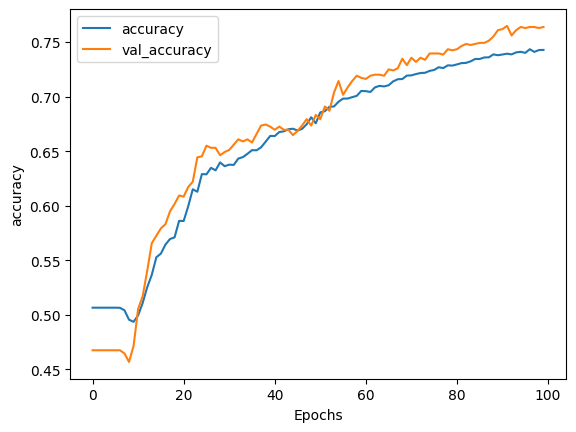

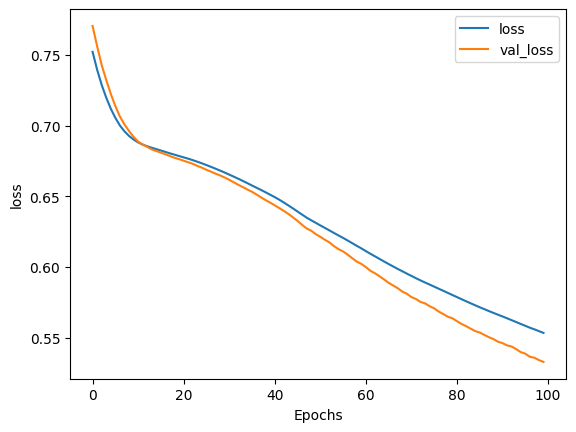

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [230]:
modelA.save('model1.h5')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               8960      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 257       
Total params: 140,801
Trainable params: 140,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
37/37 [==============================] - 1s 8ms/step - loss: 0.9237 - accuracy: 0.5762 - val_loss: 0.5532 - val_accuracy: 0.7318
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7402 - val

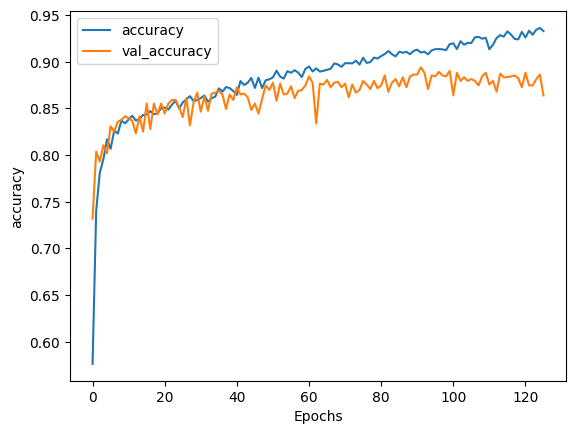

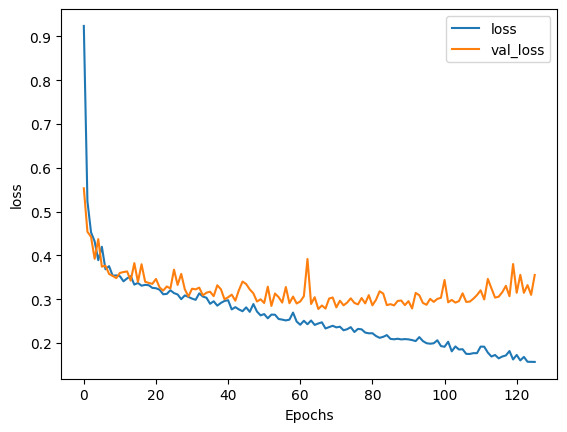

In [361]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(34,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_features,
                    train_labels,
                    epochs=200,
                    batch_size=256,
                    validation_data=(val_features, val_labels),callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60))
import matplotlib.pyplot as plt
%matplotlib inline

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [327]:
model.save('model6.h5')

In [362]:
test_loss, test_acc  = model.evaluate(test_features, test_labels)
print(test_acc)

36/36 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8705
0.8705161809921265


In [363]:
from tensorflow.keras.models import load_model
for i in range(6,7):
    modeltest = load_model('model{}.h5'.format(i))
    test_loss, test_acc  = modeltest.evaluate(test_features, test_labels)
    print('Model {}:'.format(i), test_acc)

36/36 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.8723
Model 6: 0.8722659945487976


In [379]:
import re
model = load_model('model6.h5')
def predictthing(url):

    url_length = len(url)
    alpha=0
    numeric=0

    #hostname = re.findall('://([\w\-\.]+)', url)[0]
    token = re.findall('(\w+)://',url)[0]
    hostname, port, path = re.findall(':\/\/([\w\-\.]+):?(\d+)?([A-Za-z0-9-\/]+)', url)[0]

    #hostname, port, path = re.findall('://([\w\-\.]+)[:(\d+\/)]([A-Za-z0-9-/]+)', url)[0]
    features = [url_length, len(hostname)]
    for character in '.-@?&=_~%/*:,;$ ':
        features.append(url.count(character))



    in_path =  1 if 'http' in path else 0
    http_token = 1 if token != 'https' else 0
    has_port = 1 if port else 0
    for i in url:  
        if (i.isnumeric()):
            numeric+=1
    def check_abnormal_subdomain(s):
        a = s.split('.')
        if len(a) != 4:
            return 0
        for x in a:
            if not x.isdigit():
                return 0
            i = int(x)
            if i < 0 or i > 255:
                return 0
        return 1
    raw = hostname+path

    def splitwords(string):
        word_length = []
        string+='/'
        current_word = ''
        for char in string:

            if char.isalnum():
                current_word+=char
            else:

                word_length.append(len(current_word))
                current_word=''

        return word_length

    raw_lengths = splitwords(raw)
    host_lengths = splitwords(hostname)
    path_lengths = splitwords(path[1:])

    def avg(lengths):
        return sum(lengths)/len(lengths)

    features.extend([url.count('www'), url.count('com')-1,in_path, http_token, numeric/len(url), has_port, check_abnormal_subdomain(hostname)])
    features.extend([min(raw_lengths), min(host_lengths), min(path_lengths),max(raw_lengths), max(host_lengths), max(path_lengths),avg(raw_lengths), avg(host_lengths), avg(path_lengths) ]) 
    
    dataframecolumns = [ 'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'http_in_path', 'https_token', 'ratio_digits_url', 'port',
       'abnormal_subdomain', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_host',
       'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path']
    #original_dataframe = df.copy()
    #original_dataframe = original_dataframe.drop('status', axis=1)
    #original_dataframe = original_dataframe.drop('url', axis=1)
    #features2 = pd.DataFrame([features], columns=original_dataframe.columns)
    features2 = pd.DataFrame([features])

    #original_dataframe = pd.concat([original_dataframe, features2])
    #normalized_df = mean_max_normalization(original_dataframe,numeric_columns)
    #normalized_features = normalized_df.tail(1)
    #prob = model.predict(normalized_features)
    prob = model.predict(features2)
    return prob

In [382]:

np.argmax(predictthing('http://www.mutuo.it'))

0

In [369]:
df.copy().columns

Index(['url', 'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'http_in_path', 'https_token', 'ratio_digits_url', 'port',
       'abnormal_subdomain', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_words_raw', 'longest_word_host',
       'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path',
       'status'],
      dtype='object')

In [309]:
df.copy()

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,status
0,37,19,3,0,0,0,0,0,0,0,...,3,3,3,11,11,6,5.750000,7.00,4.500000,0
1,77,23,1,0,0,0,0,0,0,0,...,2,19,2,32,19,32,15.750000,19.00,14.666667,1
2,126,50,4,1,0,1,2,3,2,0,...,2,3,2,17,13,17,8.250000,8.40,8.142857,1
3,18,11,2,0,0,0,0,0,0,0,...,5,5,0,5,5,0,5.000000,5.00,0.000000,0
4,55,15,2,2,0,0,0,0,0,0,...,3,3,4,11,7,11,6.333333,5.00,7.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,2,0,0,0,0,0,0,0,...,3,3,8,11,9,11,7.750000,6.00,9.500000,0
11426,84,18,5,0,1,1,0,1,0,0,...,3,3,3,10,10,8,5.166667,6.50,4.900000,1
11427,105,16,2,6,0,1,0,1,1,0,...,1,3,1,15,8,15,6.153846,5.50,6.272727,0
11428,38,30,2,0,0,0,0,0,0,0,...,3,3,0,22,22,0,12.500000,12.50,0.000000,0


In [358]:
datalol = pd.read_csv('dataset_phishing_red2.csv')
correct = 0
for i in range(len(datalol['url'])-11000):
    prob = predictthing(datalol['url'][i])[0]
    if prob > 0.5 and datalol['status'][i]=='phishing':
        correct+=1
    if prob < 0.5 and datalol['status'][i]=='legitimate':
        correct+=1
print(correct/430 )
print(correct)

0.8395348837209302
361


In [22]:
re.findall('://([\w\-\.]+):(\d+\/)([A-Za-z0-9-/]+)', url)

[]

In [218]:
test_features

,length_url,length_hostname,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,...,abnormal_subdomain,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path
4402,-0.128885,-0.472342,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,1.534217,0,...,0,-0.509749,-0.766166,0.534097,-0.244258,-0.297656,-0.024332,-0.263461,-0.608693,0.196954
527,0.504085,-0.472342,-0.351010,0.001174,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,0,...,0,-0.509749,-0.512450,-0.133086,-0.289543,-0.500422,-0.067665,-0.281735,-0.608693,0.158086
8001,-0.617176,-0.193964,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,0,...,0,-0.057562,-0.512450,-0.800270,-0.198974,0.107876,-0.457666,-0.062447,-0.189497,-0.712552
6966,-0.599091,-0.101171,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,0,...,0,-0.057562,-0.512450,-0.800270,-0.198974,0.107876,-0.457666,-0.062447,-0.189497,-0.712552
9889,-0.490582,0.362793,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,0,...,0,-0.057562,-0.512450,-0.800270,0.072732,1.324470,-0.457666,0.661204,0.648895,-0.712552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,0.214727,-0.472342,1.839369,-0.477984,-0.142915,2.356473,-0.197604,0.708047,-0.295128,0,...,0,-0.961936,-0.512450,-0.466678,-0.289543,-0.500422,-0.067665,-0.654525,-0.608693,-0.106215
2470,0.377491,-0.657928,1.109242,0.001174,-0.142915,2.356473,-0.197604,0.708047,-0.295128,0,...,0,-0.509749,-0.512450,-0.133086,0.208585,-0.905953,0.409002,-0.564982,-0.888157,-0.012932
8875,-0.526752,-1.214684,-1.081136,-0.477984,-0.142915,2.356473,-0.197604,0.708047,-0.295128,0,...,0,-0.509749,-0.005017,-0.133086,-0.425396,-1.108719,-0.197666,-0.665489,-0.748425,-0.106215
1148,0.865782,2.218649,4.029747,0.480332,6.288241,2.356473,-0.197604,0.708047,-0.295128,0,...,1,-0.961936,-1.019883,-0.133086,-0.063121,0.716173,-0.067665,-0.416232,-0.468961,0.018162


In [ ]:
Model4 = larger network 256 256 dense
model321 = smaller network30 to 64 dense